In [54]:
import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt8135530/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8806264/?ref_=ttep_ep2",
                   "https://www.imdb.com/title/tt8806262/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt8806266/?ref_=ttep_ep4",
                   "https://www.imdb.com/title/tt8806268/?ref_=ttep_ep5",
                   "https://www.imdb.com/title/tt8806274/?ref_=ttep_ep6",
                   "https://www.imdb.com/title/tt8806270/?ref_=ttep_ep7",
                   "https://www.imdb.com/title/tt8806272/?ref_=ttep_ep8"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número

    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nota": float(nota), "votos": int(votos)}
    planilha.append(dicionario)
    
print(planilha)

[{'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 1', 'nota': 8.3, 'votos': 2073}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 2', 'nota': 8.4, 'votos': 1537}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 3', 'nota': 8.7, 'votos': 1365}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 4', 'nota': 9.3, 'votos': 1673}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 5', 'nota': 8.5, 'votos': 1078}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 6', 'nota': 8.6, 'votos': 1026}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 7', 'nota': 9.0, 'votos': 1102}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 8', 'nota': 8.9, 'votos': 1166}]


In [55]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("euphoria.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,episodio,nota,serie,temporada,votos
3,4,9.3,Euphoria,1,1673
6,7,9.0,Euphoria,1,1102
7,8,8.9,Euphoria,1,1166
2,3,8.7,Euphoria,1,1365
5,6,8.6,Euphoria,1,1026
4,5,8.5,Euphoria,1,1078
1,2,8.4,Euphoria,1,1537
0,1,8.3,Euphoria,1,2073


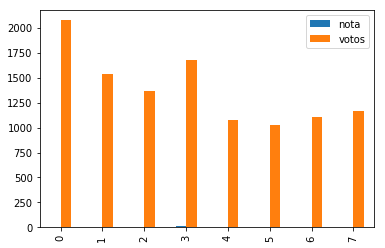

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot.bar()

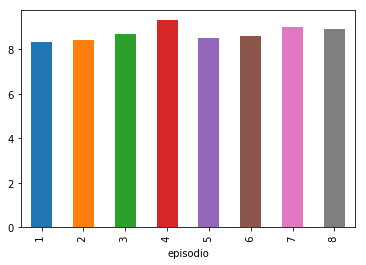

In [57]:
agrupamento = df.groupby("episodio")["nota"].mean()
agrupamento.plot.bar()